### 2. 어떤 특징이 있는 다이아몬드가 비싼 다이아몬드인지 분석해보세요.
- 본인이 보석 감별사라고 생각하고 어떤 지표가 높은 다이아몬드의 가격을 결정하는지 분석해 보세요.
- 위의 tips와 같이 3가지 이상의 가설을 세워 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.

In [548]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## 가설 -> 다이아몬드 가격에는 4C가 가장 큰 영향을 미칠 것이다

# 다이아몬드 data 불러오기

In [549]:
diamonds_df = sns.load_dataset("diamonds")

# 데이터들 특징 파악

In [550]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [551]:
diamonds_df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


# 결측데이터 여부 확인

In [552]:
diamonds_df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

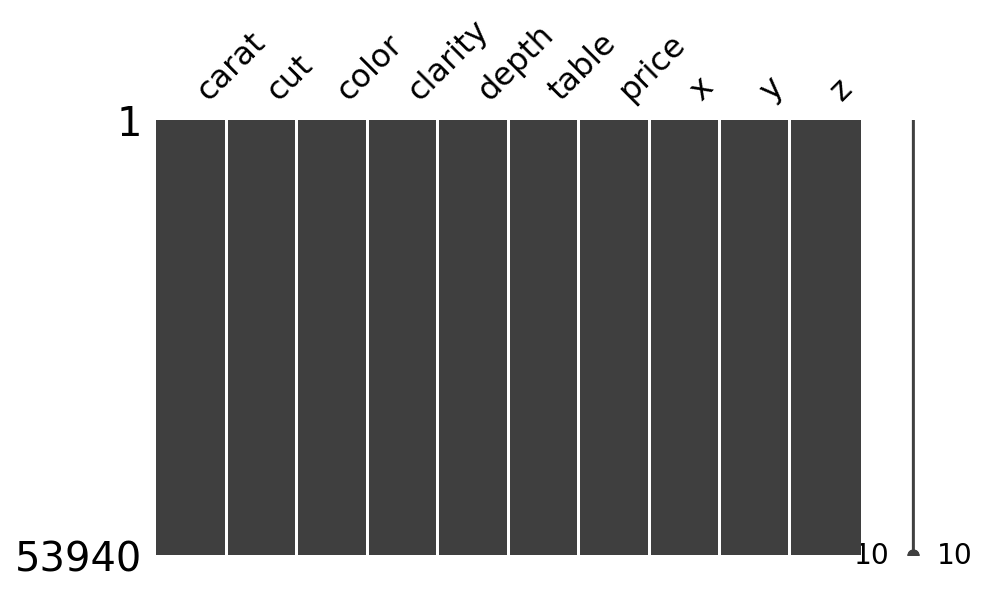

In [553]:
msno.matrix(diamonds_df, figsize=(7,4))
plt.show()

In [554]:
# cut, color, clarity는 실수형 데이터가 아니다 -> 정규화 작업 진행
diamonds_df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# 정규화 작업

In [555]:
# int 데이터를 등급별로 숫자로 변환하는 _t 컬럼 추가
# cut 변환
diamonds_df.loc[diamonds_df["cut"] == "Fair", "cut_t"] = 1
diamonds_df.loc[diamonds_df["cut"] == "Good", "cut_t"] = 2
diamonds_df.loc[diamonds_df["cut"] == "Very Good", "cut_t"] = 3
diamonds_df.loc[diamonds_df["cut"] == "Premium", "cut_t"] = 4
diamonds_df.loc[diamonds_df["cut"] == "Ideal", "cut_t"] = 5

# color 변환
diamonds_df.loc[diamonds_df["color"] == "D", "color_t"] = 7
diamonds_df.loc[diamonds_df["color"] == "E", "color_t"] = 6
diamonds_df.loc[diamonds_df["color"] == "F", "color_t"] = 5
diamonds_df.loc[diamonds_df["color"] == "G", "color_t"] = 4
diamonds_df.loc[diamonds_df["color"] == "H", "color_t"] = 3
diamonds_df.loc[diamonds_df["color"] == "I", "color_t"] = 2
diamonds_df.loc[diamonds_df["color"] == "J", "color_t"] = 1

# clarity 변환
diamonds_df.loc[diamonds_df["clarity"] == "I1", "clar_t"] = 1
diamonds_df.loc[diamonds_df["clarity"] == "IF", "clar_t"] = 2
diamonds_df.loc[diamonds_df["clarity"] == "SI1", "clar_t"] = 3
diamonds_df.loc[diamonds_df["clarity"] == "SI2", "clar_t"] = 4
diamonds_df.loc[diamonds_df["clarity"] == "VS1", "clar_t"] = 5
diamonds_df.loc[diamonds_df["clarity"] == "VS2", "clar_t"] = 6
diamonds_df.loc[diamonds_df["clarity"] == "VVS1", "clar_t"] = 7
diamonds_df.loc[diamonds_df["clarity"] == "VVS2", "clar_t"] = 8
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_t,color_t,clar_t
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.0,6.0,4.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,6.0,3.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.0,6.0,5.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,2.0,6.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,1.0,4.0


In [556]:
diamonds_df = diamonds_df[['carat', 'cut_t', 'color_t', 'clar_t', 'depth', 'table', 'price']]
diamonds_df.head()

,carat,cut_t,color_t,clar_t,depth,table,price
0,0.23,5.0,6.0,4.0,61.5,55.0,326
1,0.21,4.0,6.0,3.0,59.8,61.0,326
2,0.23,2.0,6.0,5.0,56.9,65.0,327
3,0.29,4.0,2.0,6.0,62.4,58.0,334
4,0.31,2.0,1.0,4.0,63.3,58.0,335


In [557]:
# 숫자로 변환된 등급을 포함한 모든 숫자가 0 ~ 1 사이의 값을 갖도록 정규화
from sklearn import preprocessing

In [558]:
diamonds_df['carat'] = preprocessing.minmax_scale(diamonds_df['carat'])
diamonds_df['cut_t'] = preprocessing.minmax_scale(diamonds_df['cut_t'])
diamonds_df['color_t'] = preprocessing.minmax_scale(diamonds_df['color_t'])
diamonds_df['clar_t'] = preprocessing.minmax_scale(diamonds_df['clar_t'])
diamonds_df['depth'] = preprocessing.minmax_scale(diamonds_df['depth'])
diamonds_df['table'] = preprocessing.minmax_scale(diamonds_df['table'])

In [559]:
diamonds_df.head()

,carat,cut_t,color_t,clar_t,depth,table,price
0,0.006237,1.00,0.833333,0.428571,0.513889,0.230769,326
1,0.002079,0.75,0.833333,0.285714,0.466667,0.346154,326
2,0.006237,0.25,0.833333,0.571429,0.386111,0.423077,327
3,0.018711,0.75,0.166667,0.714286,0.538889,0.288462,334
4,0.022869,0.25,0.000000,0.428571,0.563889,0.288462,335


In [560]:
# 가격기준으로 오름차순 정렬하기
diamonds_df = diamonds_df.sort_values('price').reset_index(drop=True)
diamonds_df

,carat,cut_t,color_t,clar_t,depth,table,price
0,0.006237,1.00,0.833333,0.428571,0.513889,0.230769,326
1,0.002079,0.75,0.833333,0.285714,0.466667,0.346154,326
2,0.006237,0.25,0.833333,0.571429,0.386111,0.423077,327
3,0.018711,0.75,0.166667,0.714286,0.538889,0.288462,334
4,0.022869,0.25,0.000000,0.428571,0.563889,0.288462,335
...,...,...,...,...,...,...,...
53935,0.374220,0.50,0.333333,0.285714,0.550000,0.269231,18803
53936,0.388773,1.00,0.500000,0.428571,0.541667,0.230769,18804
53937,0.272349,1.00,0.500000,0.142857,0.519444,0.230769,18806
53938,0.374220,0.50,0.500000,0.285714,0.569444,0.250000,18818


# 정규화시킨 데이터의 pdf

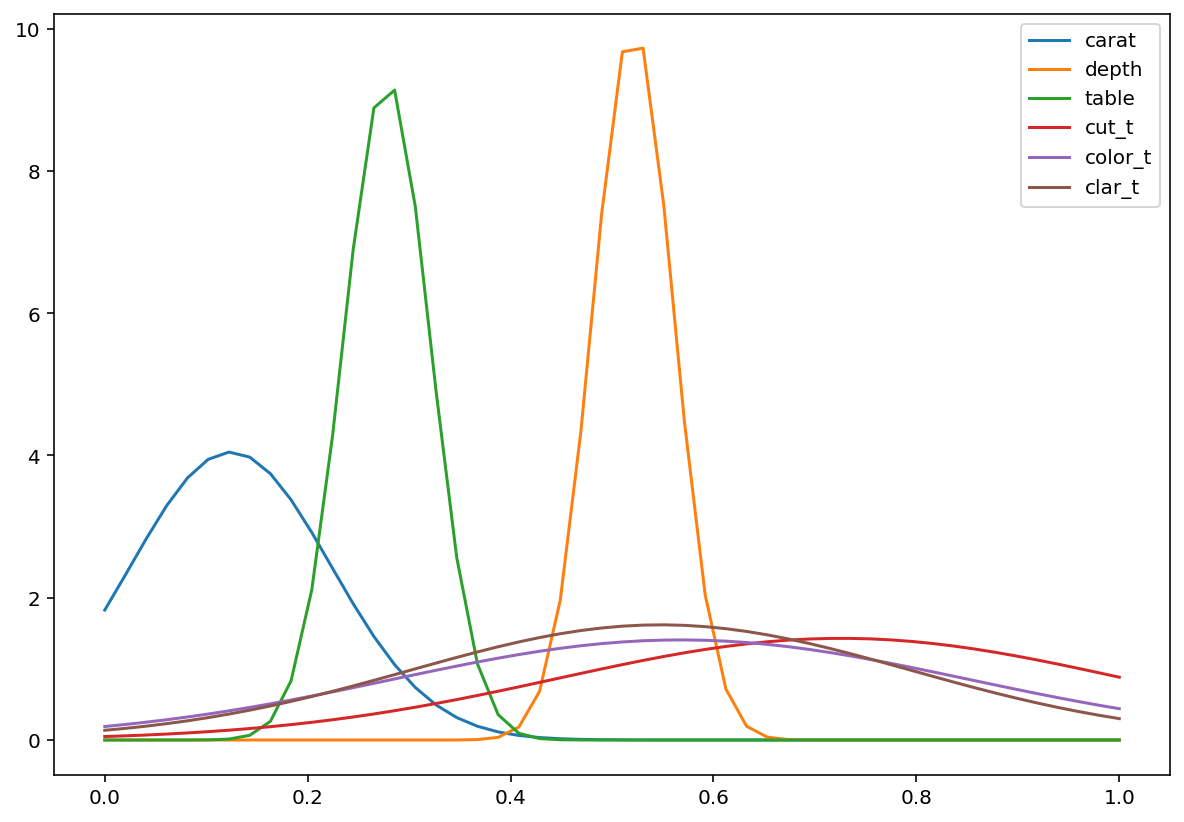

In [472]:
plt.figure(figsize=(10, 7))
xx = np.linspace(0,1)
rv_carat = sp.stats.norm(loc=diamonds_df.describe()['carat']['mean'], scale=diamonds_df.describe()['carat']['std'])
rv_depth = sp.stats.norm(loc=diamonds_df.describe()['depth']['mean'], scale=diamonds_df.describe()['depth']['std'])
rv_table = sp.stats.norm(loc=diamonds_df.describe()['table']['mean'], scale=diamonds_df.describe()['table']['std'])
rv_cut_t = sp.stats.norm(loc=diamonds_df.describe()['cut_t']['mean'], scale=diamonds_df.describe()['cut_t']['std'])
rv_color_t = sp.stats.norm(loc=diamonds_df.describe()['color_t']['mean'], scale=diamonds_df.describe()['color_t']['std'])
rv_clar_t = sp.stats.norm(loc=diamonds_df.describe()['clar_t']['mean'], scale=diamonds_df.describe()['clar_t']['std'])
pdf_carat = rv_carat.pdf(xx)
pdf_depth = rv_depth.pdf(xx)
pdf_table = rv_table.pdf(xx)
pdf_cut_t = rv_cut_t.pdf(xx)
pdf_color_t = rv_color_t.pdf(xx)
pdf_clar_t = rv_clar_t.pdf(xx)
plt.plot(xx, pdf_carat, label='carat')
plt.plot(xx, pdf_depth, label='depth')
plt.plot(xx, pdf_table, label='table')
plt.plot(xx, pdf_cut_t, label='cut_t')
plt.plot(xx, pdf_color_t, label='color_t')
plt.plot(xx, pdf_clar_t, label='clar_t')
plt.legend()
plt.show()

# 정규화시킨 데이터와 가격의 상관관계

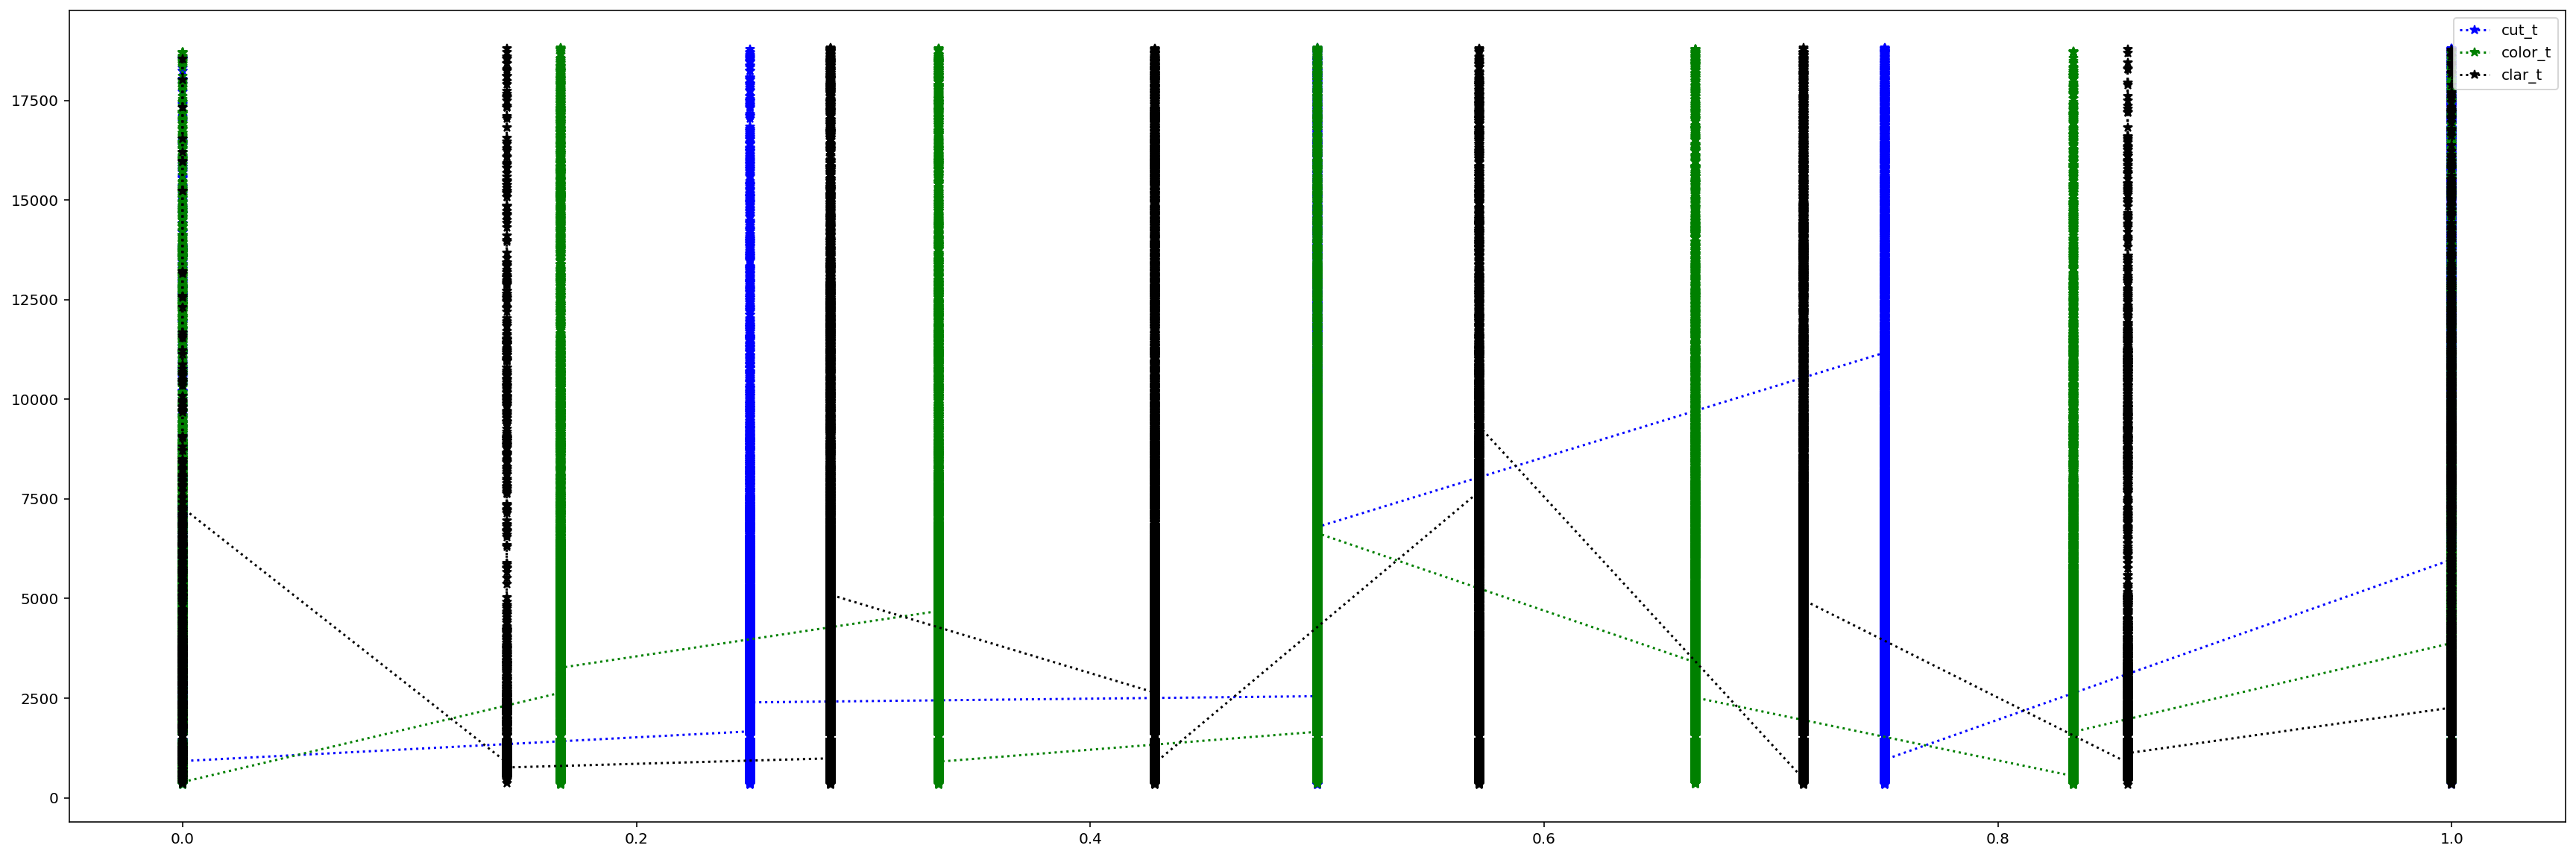

In [573]:
# 3C와 price의 관계 확인 -> 무슨관계인지 알 수 없다

plt.figure(figsize=(30, 10))
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('carat')['carat'][::3000]), diamonds_df.sort_values('carat')['price'][::3000], "r*:", label="carat")
plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('cut_t')['cut_t']), diamonds_df.sort_values('cut_t')['price'], "b*:", label="cut_t")
plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('color_t')['color_t']), diamonds_df.sort_values('color_t')['price'], "g*:",label="color_t")
plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('clar_t')['clar_t']), diamonds_df.sort_values('clar_t')['price'], "k*:",label="clar_t")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('depth')['depth']), diamonds_df.sort_values('depth')['price'], "c*:",label="depth")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('table')['table']), diamonds_df.sort_values('table')['price'], "m*:",label="table")
plt.legend(loc=0)
plt.show()



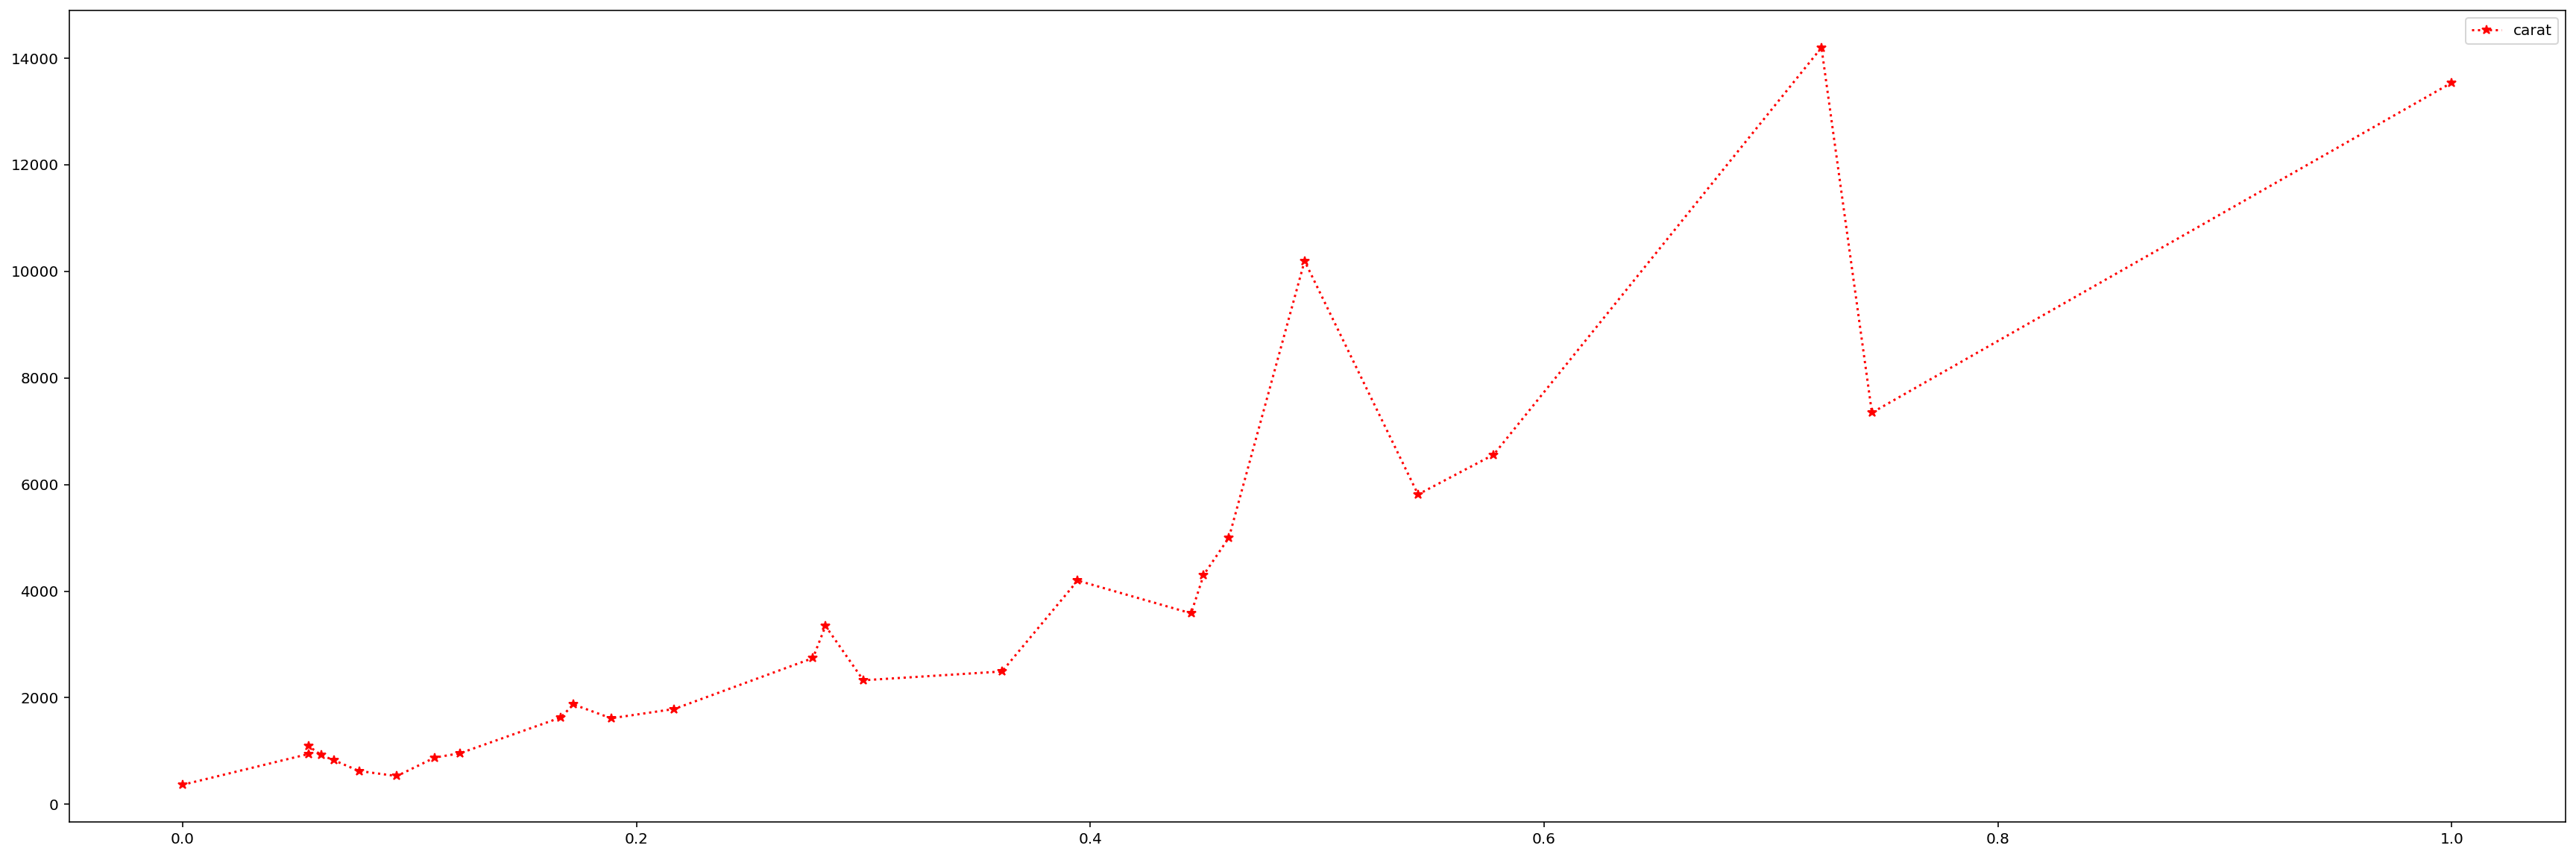

In [575]:
# carat과 price의 관계 -> 전체적으로 양의 상관관계를 가진다

plt.figure(figsize=(30, 10))
plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('carat')['carat'][::2000]), diamonds_df.sort_values('carat')['price'][::2000], "r*:", label="carat")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('cut_t')['cut_t']), diamonds_df.sort_values('cut_t')['price'], "b*:", label="cut_t")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('color_t')['color_t']), diamonds_df.sort_values('color_t')['price'], "g*:",label="color_t")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('clar_t')['clar_t']), diamonds_df.sort_values('clar_t')['price'], "k*:",label="clar_t")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('depth')['depth']), diamonds_df.sort_values('depth')['price'], "c*:",label="depth")
# plt.plot(preprocessing.minmax_scale(diamonds_df.sort_values('table')['table']), diamonds_df.sort_values('table')['price'], "m*:",label="table")
plt.legend(loc=0)
plt.show()

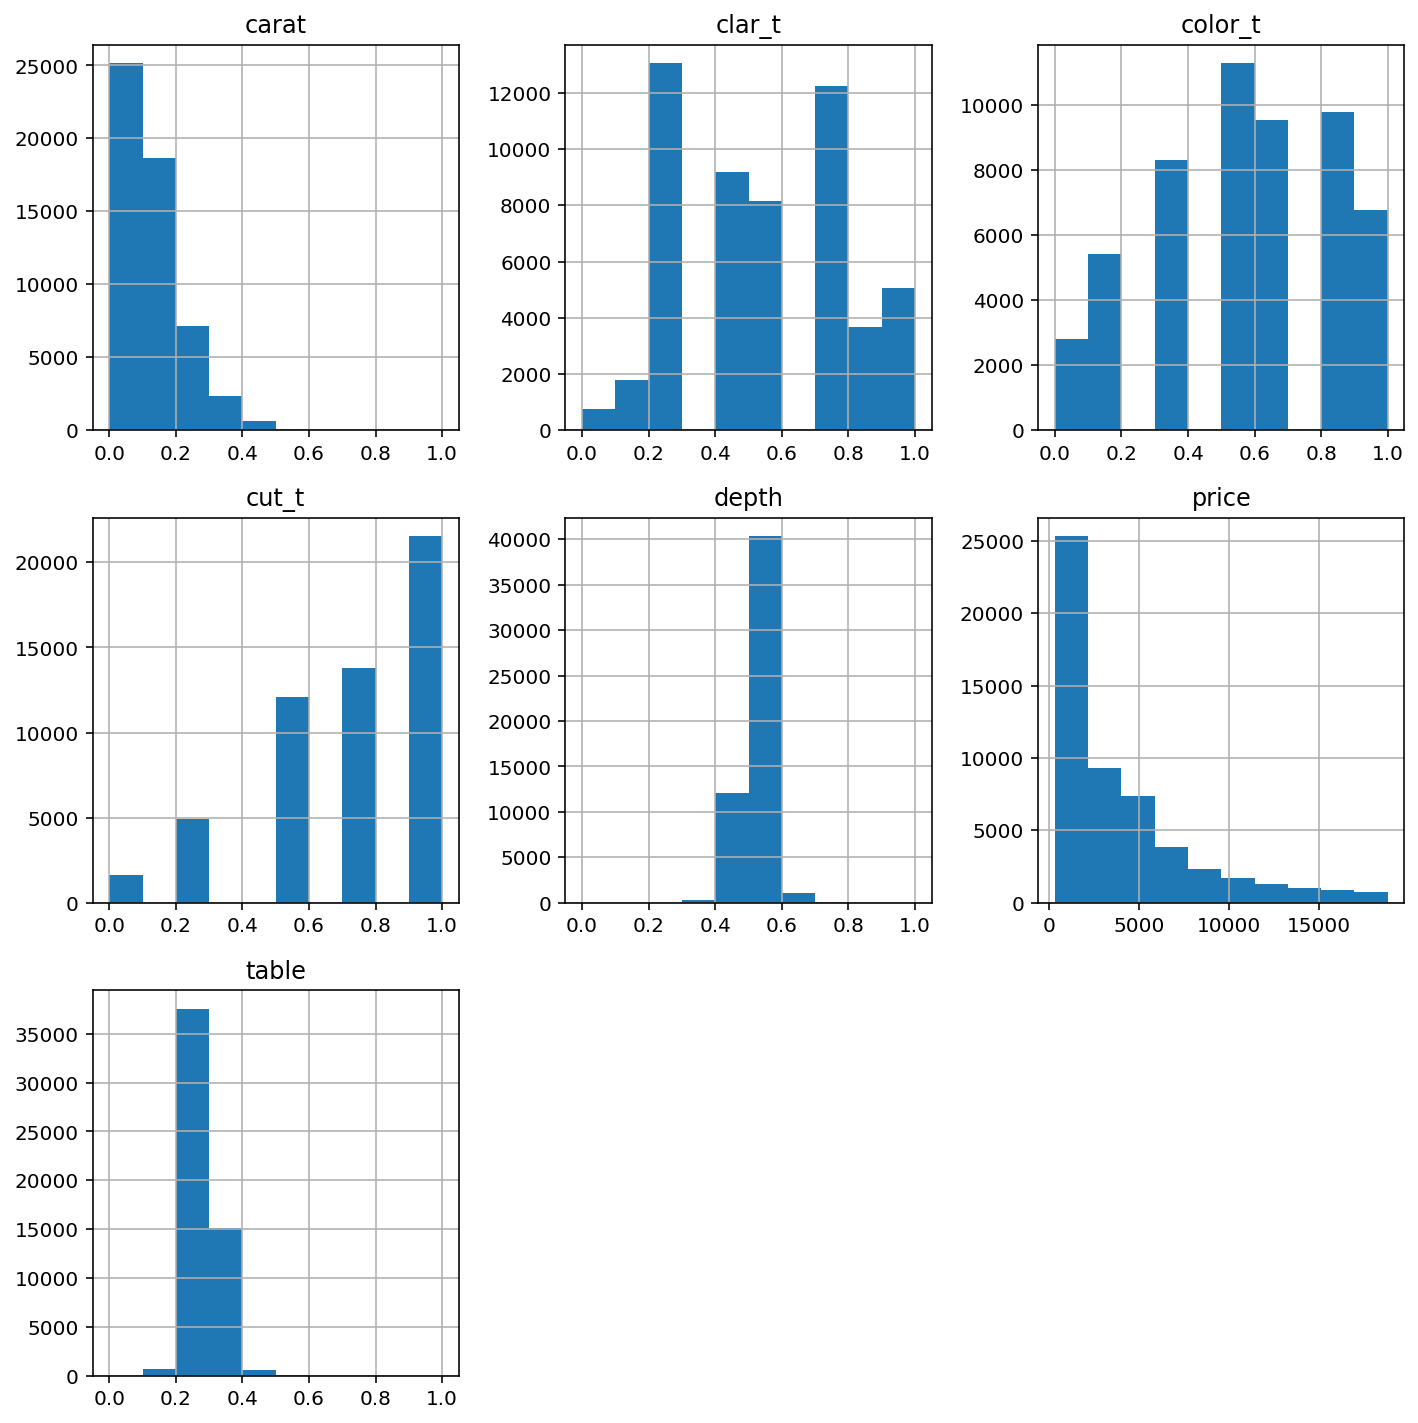

In [478]:
diamonds_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [509]:
# cut_t 비싼가격 순서로 상위 5000개, 낮은가격 순서로 하위 5000개 비교
pd.concat([
    diamonds_df[::-1][:5000]['cut_t'].reset_index().groupby('cut_t').size().reset_index().rename(columns={0:'count'}),
    diamonds_df[:5000]['cut_t'].reset_index().groupby('cut_t').size().reset_index().rename(columns={0:'count'})
], axis=1)

,cut_t,count,cut_t,count
0,0.00,140,0.00,25
1,0.25,359,0.25,573
2,0.50,1067,0.50,1580
3,0.75,1735,0.75,910
4,1.00,1699,1.00,1912


In [578]:
# color_t 비싼가격 순서로 상위 5000개, 낮은가격 순서로 하위 5000개 비교
pd.concat([
    diamonds_df[::-1][:5000]['color_t'].reset_index().groupby('color_t').size().reset_index().rename(columns={0:'count'}),
    diamonds_df[:5000]['color_t'].reset_index().groupby('color_t').size().reset_index().rename(columns={0:'count'})
], axis=1)

,color_t,count,color_t,count
0,0.000000,429,0.000000,267
1,0.166667,839,0.166667,715
2,0.333333,976,0.333333,999
3,0.500000,1044,0.500000,924
4,0.666667,760,0.666667,708
5,0.833333,559,0.833333,833
6,1.000000,393,1.000000,554


In [580]:
# clar_t 비싼가격 순서로 상위 5000개, 낮은가격 순서로 하위 5000개 비교
pd.concat([
    diamonds_df[::-1][:5000]['clar_t'].reset_index().groupby('clar_t').size().reset_index().rename(columns={0:'count'}),
    diamonds_df[:5000]['clar_t'].reset_index().groupby('clar_t').size().reset_index().rename(columns={0:'count'})
], axis=1)

,clar_t,count,clar_t,count
0,0.000000,29,0.000000,25
1,0.142857,158,0.142857,62
2,0.285714,1131,0.285714,1329
3,0.428571,1202,0.428571,610
4,0.571429,695,0.571429,877
5,0.714286,1126,0.714286,1136
6,0.857143,239,0.857143,344
7,1.000000,420,1.000000,617


# 최종 상관관계 확인

In [583]:
corr_datas = [
    {"price":"carat", "corroef":round(np.corrcoef(diamonds_df['carat'], diamonds_df['price'])[0, 1], 2)},
    {"price":"cut_t", "corroef":round(np.corrcoef(diamonds_df['cut_t'], diamonds_df['price'])[0, 1], 2)},
    {"price":"color_t", "corroef":round(np.corrcoef(diamonds_df['color_t'], diamonds_df['price'])[0, 1], 2)},
    {"price":"clar_t", "corroef":round(np.corrcoef(diamonds_df['clar_t'], diamonds_df['price'])[0, 1], 2)},
    {"price":"depth", "corroef":round(np.corrcoef(diamonds_df['depth'], diamonds_df['price'])[0, 1], 2)},
    {"price":"table", "corroef":round(np.corrcoef(diamonds_df['table'], diamonds_df['price'])[0, 1], 2)},
]

In [584]:
corr = pd.DataFrame(corr_datas)
corr.sort_values('corroef', ascending=False).reset_index(drop=True)

,price,corroef
0,carat,0.92
1,table,0.13
2,depth,-0.01
3,cut_t,-0.05
4,clar_t,-0.07
5,color_t,-0.17
